In [2]:
import pandas as pd 
import IPython.display as ipd
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import tqdm
import PIL

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
#import sys
#!conda install --yes --prefix {sys.prefix} pillow

In [6]:
data = pd.read_csv("ESC-50-master/meta/esc50.csv") 

In [7]:
data.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [8]:
data["category"]

0                    dog
1         chirping_birds
2         vacuum_cleaner
3         vacuum_cleaner
4           thunderstorm
5           thunderstorm
6        door_wood_knock
7            can_opening
8                   crow
9        door_wood_knock
10       door_wood_knock
11              clapping
12              clapping
13              clapping
14                   dog
15              clapping
16          thunderstorm
17             fireworks
18             fireworks
19             fireworks
20             fireworks
21              clapping
22              clapping
23              clapping
24              chainsaw
25              airplane
26           mouse_click
27         pouring_water
28                 train
29                 sheep
              ...       
1970         water_drops
1971      glass_breaking
1972      chirping_birds
1973                 cat
1974         water_drops
1975            laughing
1976    drinking_sipping
1977         can_opening
1978           breathing


In [9]:
dogs = data[data['category']=="dog"]
print(dogs)
len(dogs)

              filename  fold  target category  esc10  src_file take
0     1-100032-A-0.wav     1       0      dog   True    100032    A
14    1-110389-A-0.wav     1       0      dog   True    110389    A
157    1-30226-A-0.wav     1       0      dog   True     30226    A
158    1-30344-A-0.wav     1       0      dog   True     30344    A
170    1-32318-A-0.wav     1       0      dog   True     32318    A
296    1-59513-A-0.wav     1       0      dog   True     59513    A
375    1-85362-A-0.wav     1       0      dog   True     85362    A
392    1-97392-A-0.wav     1       0      dog   True     97392    A
478   2-114280-A-0.wav     2       0      dog   True    114280    A
479   2-114587-A-0.wav     2       0      dog   True    114587    A
482   2-116400-A-0.wav     2       0      dog   True    116400    A
484   2-117271-A-0.wav     2       0      dog   True    117271    A
496   2-118072-A-0.wav     2       0      dog   True    118072    A
503   2-118964-A-0.wav     2       0      dog   

40

In [10]:
data["category"].values

array(['dog', 'chirping_birds', 'vacuum_cleaner', ..., 'footsteps',
       'sheep', 'dog'], dtype=object)

In [11]:
categories = set()
for category in data["category"].values:
    categories.add(category)
print(categories)
len(categories)

{'hand_saw', 'pig', 'footsteps', 'church_bells', 'rain', 'insects', 'sneezing', 'rooster', 'sea_waves', 'water_drops', 'clock_alarm', 'coughing', 'wind', 'laughing', 'door_wood_creaks', 'sheep', 'car_horn', 'clapping', 'washing_machine', 'airplane', 'engine', 'fireworks', 'toilet_flush', 'snoring', 'thunderstorm', 'mouse_click', 'drinking_sipping', 'clock_tick', 'chainsaw', 'hen', 'vacuum_cleaner', 'glass_breaking', 'dog', 'breathing', 'brushing_teeth', 'crying_baby', 'pouring_water', 'crickets', 'cat', 'crackling_fire', 'chirping_birds', 'crow', 'cow', 'keyboard_typing', 'helicopter', 'frog', 'siren', 'train', 'can_opening', 'door_wood_knock'}


50

In [12]:
dogs.values[3][0]

'1-30344-A-0.wav'

ESC-50-master/audio/1-100032-A-0.wav


ESC-50-master/audio/1-110389-A-0.wav


ESC-50-master/audio/1-30226-A-0.wav


ESC-50-master/audio/1-30344-A-0.wav


ESC-50-master/audio/1-32318-A-0.wav


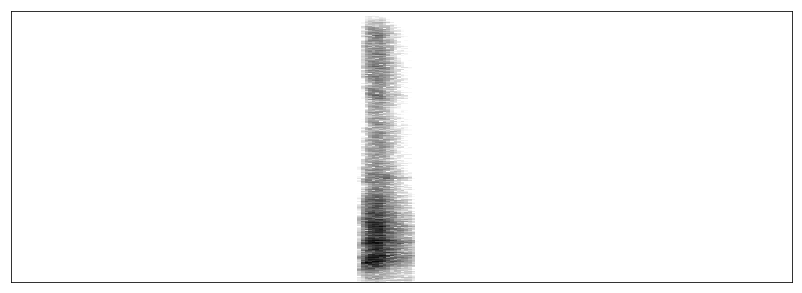

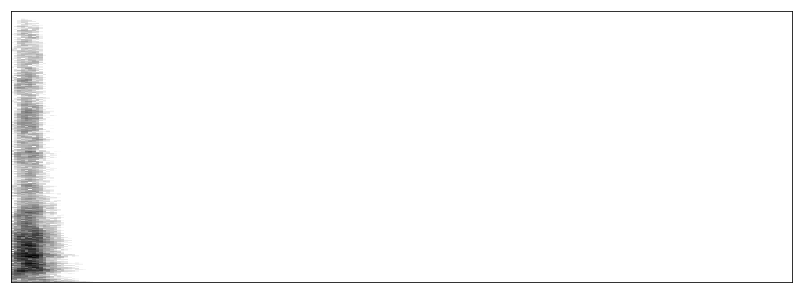

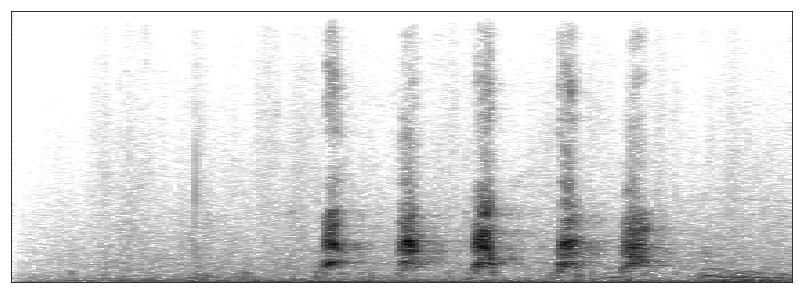

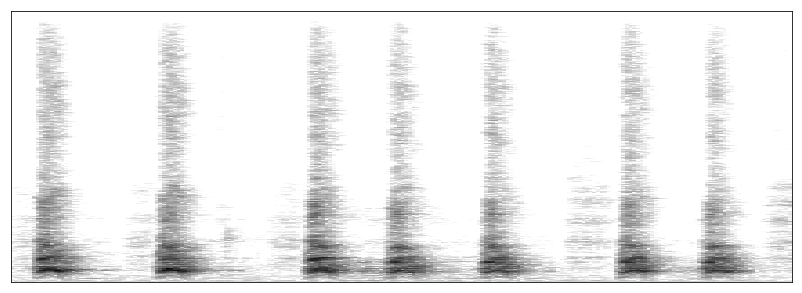

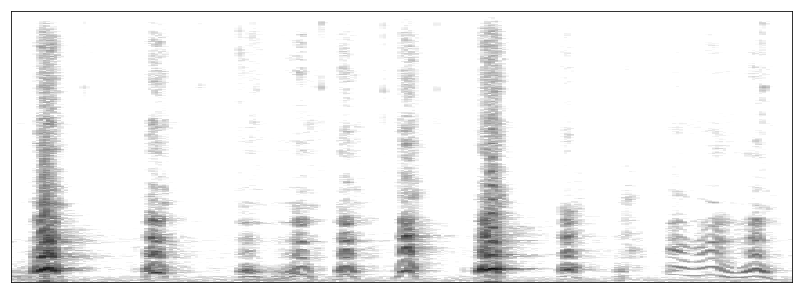

In [13]:
import time
for i, dog in enumerate(dogs.values[:5]):
    dog_wav_path = "ESC-50-master/audio/" + dogs.values[i][0]
    print(dog_wav_path)
    ipd.display(ipd.Audio(url=dog_wav_path))
    audio, sr = librosa.load(dog_wav_path)
    X = librosa.stft(audio)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    ipd.display(librosa.display.specshow(Xdb, sr=sr, cmap='gray_r'))


ESC-50-master/audio/5-9032-A-0.wav


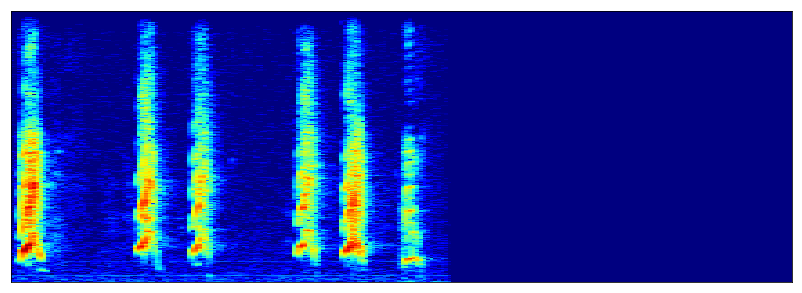

In [14]:
from matplotlib import cm
import pylab
dog_wav_path = 'ESC-50-master/audio/5-9032-A-0.wav'
print(dog_wav_path)
ipd.display(ipd.Audio(url=dog_wav_path))
audio, sr = librosa.load(dog_wav_path)
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
ipd.display(librosa.display.specshow(Xdb, sr=sr, cmap=cm.jet))


In [18]:
import os

import matplotlib
matplotlib.use('agg')

from matplotlib import pyplot as plt
from matplotlib import cm
from tqdm import tqdm
import pylab

import librosa
from librosa import display
import numpy as np

src = 'ESC-50-master/audio/5-9032-A-0.wav'
dest = "test.jpg"
def create_spectrograph(source_filepath, destination_filepath):    
    y, sr = librosa.load(source_filepath, sr = 22050) # Use the default sampling rate of 22,050 Hz

    # Pre-emphasis filter
    pre_emphasis = 0.97
    y = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

    # Compute spectrogram
    M = librosa.feature.melspectrogram(y, 
                                       sr, 
                                       fmax = sr/2, # Maximum frequency to be used on the on the MEL scale        
                                       n_fft=2048, 
                                       hop_length=512, 
                                       n_mels = 96, # As per the Google Large-scale audio CNN paper
                                       power = 2) # Power = 2 refers to squared amplitude
    # Power in DB
    log_power = librosa.power_to_db(M, ref=np.max)# Covert to dB (log) scale

    # Plotting the spectrogram and save as JPG without axes (just the image)
    pylab.figure(figsize=(5,5)) #was 14, 5
    pylab.axis('off') 
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
    librosa.display.specshow(log_power, cmap=cm.jet)
    pylab.savefig(destination_filepath, bbox_inches=None, pad_inches=0)
    pylab.close()

create_spectrograph(src, dest)

In [20]:
wavs = {}

for file in data.values:
    category = file[3]
    filename = file[0]
    if category not in wavs:
        wavs[category] = []
    wavs[category].append(filename)
print(wavs.keys())
print(len(wavs.keys()))

#create directory structure
root_dir = "spectrographs"
os.mkdir(root_dir)
for category in wavs.keys():
    try:  
        os.mkdir(root_dir + "/" + category)
    except OSError:  
        print ("Creation of the directory %s failed" % category)
    else:  
        print ("Successfully created the directory %s " % category)

for category in wavs.keys():
    files = wavs[category]
    for file in files:
        src = "ESC-50-master/audio/" + file
        dest = root_dir + "/" + category + "/" + file + ".jpg"
        create_spectrograph(src, dest)

print("done!")
        

    
    

dict_keys(['dog', 'chirping_birds', 'vacuum_cleaner', 'thunderstorm', 'door_wood_knock', 'can_opening', 'crow', 'clapping', 'fireworks', 'chainsaw', 'airplane', 'mouse_click', 'pouring_water', 'train', 'sheep', 'water_drops', 'church_bells', 'clock_alarm', 'keyboard_typing', 'wind', 'footsteps', 'frog', 'cow', 'brushing_teeth', 'car_horn', 'crackling_fire', 'helicopter', 'drinking_sipping', 'rain', 'insects', 'laughing', 'hen', 'engine', 'breathing', 'crying_baby', 'hand_saw', 'coughing', 'glass_breaking', 'snoring', 'toilet_flush', 'pig', 'washing_machine', 'clock_tick', 'sneezing', 'rooster', 'sea_waves', 'siren', 'cat', 'door_wood_creaks', 'crickets'])
50
Successfully created the directory dog 
Successfully created the directory chirping_birds 
Successfully created the directory vacuum_cleaner 
Successfully created the directory thunderstorm 
Successfully created the directory door_wood_knock 
Successfully created the directory can_opening 
Successfully created the directory crow 
S